# Build an interface between deepXDE and Altair Simulation

In [1]:
from google.colab import drive
drive.mount('/content/Drive')

import os
os.chdir(os.path.expanduser("~"))
os.chdir("/content")
os.chdir("Drive/MyDrive/College (freshman - senior)/DS UROP/Physics ML/pinnDSE")
!ls

import sys
if 'Drive/MyDrive/College (freshman - senior)/DS UROP/Physics ML/pinnDSE' not in sys.path:
  sys.path.append('Drive/MyDrive/College (freshman - senior)/DS UROP/Physics ML/pinnDSE')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).
connectorPinn01.ipynb	  controlArm01.ipynb  fileConversion.ipynb  README.md
connectorPinnSimon.ipynb  data		      pinnDSE


In [2]:
!pip install pyNastran
!pip install trimesh
# !pip install pyvista
!pip install deepxde

# setup enviornment for interactive plotting
!apt-get install -qq xvfb
!pip install pyvista panel -q
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

import panel as pn
pn.extension('vtk')

import numpy as np
import pandas as pd
import pyvista as pv
import deepxde as dde

from pinnDSE.geom import MeshGeom
from pinnDSE.viz import *
from pinnDSE.elasticity import *
from pinnDSE.bc import *

# --UNITS--
# displacement: mm
# stress: MPa
# force: N
# E = 2e5 MPa (AISI Carbon Steel)
# nu = 0.27
# rho = 7.85e-3 
# yield = 490 MPa

Selecting previously unselected package xvfb.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.9) ...
Setting up xvfb (2:1.19.6-1ubuntu4.9) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


Using TensorFlow 2 backend.

Instructions for updating:
non-resource variables are not supported in the long term


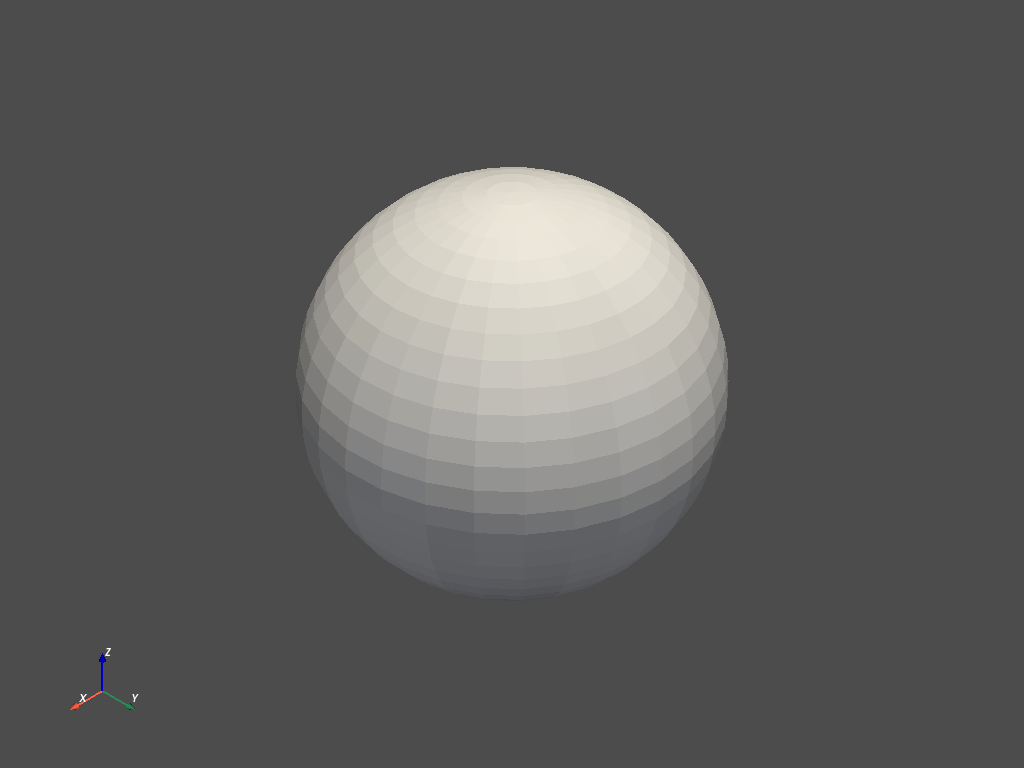

[(1.9264490110725325, 1.9264490110725325, 1.9264490110725325),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [3]:
### new cell simple plot ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason
import pyvista as pv
sphere = pv.Sphere()
sphere.plot(color='w', notebook=True)


### new cell spline example cell ###
# pn.extension('vtk')  # this needs to be at the top of each cell for some reason

# import numpy as np

# n_points = 100
# theta = np.linspace(-4 * np.pi, 4 * np.pi, n_points)
# z = np.linspace(-2, 2, n_points)
# r = z ** 2 + 1
# x = r * np.sin(theta)
# y = r * np.cos(theta)
# points = np.column_stack((x, y, z))

# # Create spline with 1000 interpolation points
# spline = pv.Spline(points, 1000)

# # add scalars to spline and plot it
# spline["scalars"] = np.arange(spline.n_points)
# tube = spline.tube(radius=0.1)
# tube.plot(smooth_shading=True, notebook=True)

In [ ]:
# load mesh and solver results
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

op2File = 'data/connector/v1.0/connectorDesign03.op2'
# geom = MeshGeom(op2File, thickness=6.35)

# load using the alternative format
meshFile = 'data/controlArm/v1.0/controlArm01_nom.vtk'
pickleFile = 'data/controlArm/v1.0/controlArm01_nom.p'
geom = MeshGeom(meshFile=meshFile, pickleFile=pickleFile)

plotScalarFields(geom.mesh, geom.resDf)

In [ ]:
# load using the alternative format
# meshFile = 'data/connector/v1.0/connectorDesign03.vtk'
# pickleFile = 'data/connector/v1.0/connectorDesign03.p'
# geom = MeshGeom(meshFile=meshFile, pickleFile=pickleFile)
# plotScalarFields(geom.mesh, geom.resDf)

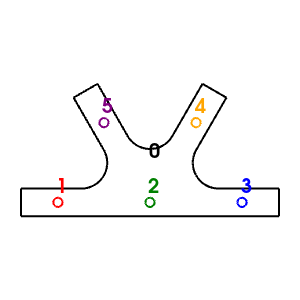

In [ ]:
drawBoundaries(geom.bndDict)

Compiling model...
Building feed-forward neural network...
'build' took 0.056818 s



C:\Users\ewhalen\Miniconda3\envs\pinnDSE\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
C:\Users\ewhalen\Miniconda3\envs\pinnDSE\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


'compile' took 1.423159 s

Initializing variables...
Training model...

Step      Train loss                                                                                                                                                                    Test loss                                                                                                                                                                     Test metric
0         [1.29e+07, 3.32e+07, 4.37e+06, 3.98e+06, 2.59e+04, 3.89e-08, 5.34e-07, 1.63e+06, 1.80e+06, 3.81e+06, 2.75e+05, 2.40e+06, 1.47e+06, 1.67e+06, 1.61e+06, 2.79e+05, 2.78e+06]    [1.33e+07, 3.40e+07, 3.75e+06, 3.11e+06, 2.15e+04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 0:
  train loss: 7.23e+07
  test loss: 5.42e+07
  test metric: []

'train' took 0.239759 s

Compiling model...
'compile' took 1.035806 s

Initializing variables...
Training mo

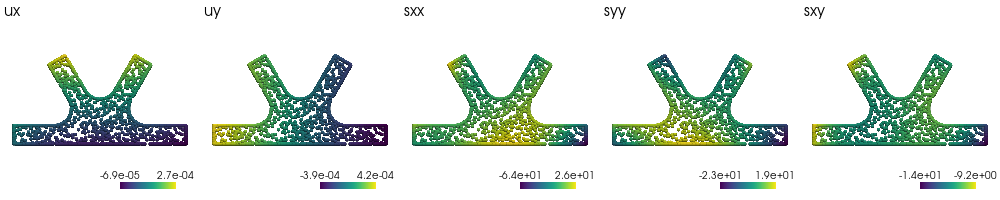

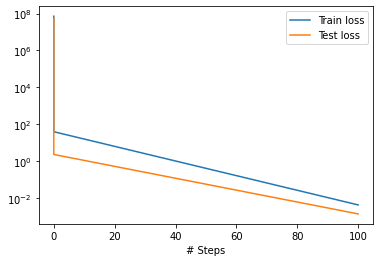

In [ ]:
# supports
xSup = SupportBC(geom, bndId=2, U=0, component=0)
ySup = SupportBC(geom, bndId=2, U=0, component=1)

# free edges
xTr0 = TractionBC(geom, bndId=0, T=0, component=0)
yTr0 = TractionBC(geom, bndId=0, T=0, component=1)

# loaded edges
xTr1 = TractionBC(geom, bndId=1, T=-1.0/geom.bndAreaDict[1], component=0)
yTr1 = TractionBC(geom, bndId=1, T=0, component=1)

xTr5 = TractionBC(geom, bndId=5, T=(-3/(4*np.sqrt(3)))/geom.bndAreaDict[5], component=0)
yTr5 = TractionBC(geom, bndId=5, T=(3/4)/geom.bndAreaDict[5], component=1)

xTr4 = TractionBC(geom, bndId=4, T=(1/(4*np.sqrt(3)))/geom.bndAreaDict[4], component=0)
yTr4 = TractionBC(geom, bndId=4, T=(1/4)/geom.bndAreaDict[4], component=1)

xTr3 = TractionBC(geom, bndId=3, T=(1 + 1/(2*np.sqrt(3)))/geom.bndAreaDict[3], component=0)
yTr3 = TractionBC(geom, bndId=3, T=0, component=1)

# problem setup
bndNumSamplesDir = {0: 800, 1: 200, 2: 200, 3: 200, 4: 200, 5: 200}
# bndNumSamplesDir = {bndId:int(l*100) for bndId,l in geom.bndLensDict.items()}
paramDict = {'E':2e5, 'nu':0.3}
bcList = [xSup,ySup, xTr0,yTr0,xTr1,yTr1,xTr3,yTr3,xTr4,yTr4,xTr5,yTr5]
data = StrctPDE(geom, 
            elasticityEqs, 
            bcList, 
            num_domain=500, 
            num_boundary_dir=bndNumSamplesDir, 
            num_test=500,
            paramDict=paramDict)

for bc in bcList:
    if isinstance(bc, TractionBC): 
        bc.train_n = data.train_n

# build model
net = dde.maps.FNN([2] + [64]*4  + [5], "tanh", "Glorot uniform")
outScales = np.array([1e-2, 1e-2, 1e4, 1e4, 1e3]) # [ux,uy,sxx,syy,sxy]
net.apply_output_transform(lambda x,y : y*outScales) 
model = dde.Model(data, net)

# get the unweighted loss values
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(epochs=0)
lw = losshistory.loss_train[0]**(-1)

# train
model.compile("adam", lr=0.001, loss_weights=lw)
losshistory, train_state = model.train(epochs=100, display_every=100)
dde.postprocessing.plot_loss_history(losshistory)

# test
pred = model.predict(data.train_x)
predDf = pd.DataFrame(pred, columns=['ux', 'uy', 'sxx', 'syy', 'sxy'])
pc = pv.PolyData(addZ(data.train_x))
plotScalarFields(pc, predDf)

ux        0.012782
uy        0.024743
sxx    4716.493652
syy    2236.410645
sxy    1563.034180
dtype: float32


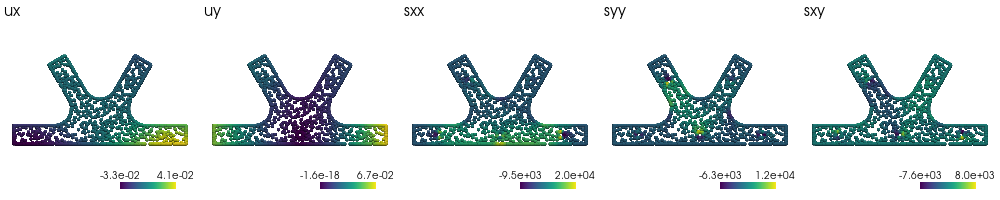

In [ ]:
intResDf = geom.sampleRes(data.train_x)
MAE = (predDf-intResDf.drop(columns='vonMises')).abs().mean()
print(MAE)
plotScalarFields(pc, intResDf)

In [ ]:
MAE = (predDf-intResDf.drop(columns='vonMises')).abs().mean()
print(MAE)

ux        0.012782
uy        0.024743
sxx    4716.493652
syy    2236.410645
sxy    1563.034180
dtype: float32


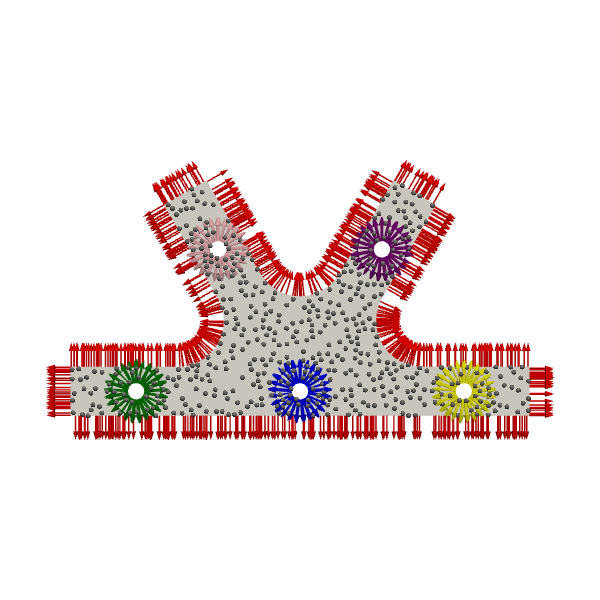

In [ ]:
plotter = pv.Plotter(border=False)
plotter.set_background('white')
plotter.add_mesh(geom.mesh, show_edges=False)

# domain samples
pc = pv.PolyData(addZ(data.domainSamples))
plotter.add_mesh(pc, render_points_as_spheres=True, color='gray')


# boundary samples
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'pink']
for bndId, color in zip(geom.bndDict.keys(), colors):
    samples = addZ(data.bndSampleDict[bndId])
    normals = addZ(data.bndNormalsDict[bndId])
    plotter.add_arrows(samples, normals, 0.1, color=color)
plotter.show(window_size=(600,600), cpos='xy');